
# Assignment 3  <font color="blue"> (15 points) </font>
 
------
### Information
**Name:** Ahmed Ibrahim

**Student Number:** 261032796

**Date:** 2021-11-07

**Course Number:** YCBS 255 - Statistical Machine Learning

------

### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [ ]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(5 points)</font>

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively. 
3. **<font color="blue">(1 point)</font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue">(2 points)</font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters. 
5. **<font color="blue">(1 point)</font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Question A1: Generate x1 array.
x1 = np.linspace(-20, 20, 100)

In [3]:
# Question A1: Generate x2, x3, x4, x5 array.
x1 = np.linspace(-20, 20, 100)
x_list = [x1]
x_range = np.arange(2,6)
for value in x_range:
  x_value = np.power(x1, value)
  x_list.append(x_value)
x2 = x_list[1]
x3 = x_list[2]
x4 = x_list[3]
x5 = x_list[4]
X = pd.DataFrame(x_list, index = ['x1', 'x2', 'x3', 'x4', 'x5']).transpose().to_numpy()

In [4]:
# Question A2: Generate 'y' function.
np.random.seed(12)
mu = 0
sigma = math.sqrt(4)
eps = np.random.normal(mu, sigma, 100)
y = 1.75 + 5*x1 + 0.05*x3 -10.3*x5 + eps

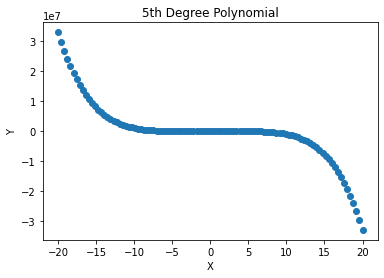

In [5]:
# Question A2: Plot polynomial.
plt.scatter(x1, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('5th Degree Polynomial')
plt.show()

In [17]:
# Question A3: Using  5-fold cross-validation, train a lasso model including with 10 different tunning parameters. 
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
k = 5
kf_5 = KFold(n_splits = k, random_state = 12, shuffle = True)
tunning_para_list = [0.05, 0.1, 1, 5, 50, 500, 2500, 10000]
lasso_avg_mse_list = []
for tunning_para in tunning_para_list:
  lasso_regression = Lasso(alpha = tunning_para)
  lasso_mse_list = []
  for train_index, test_index in kf_5.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lasso_regression.fit(X_train, y_train)
    y_pred = lasso_regression.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred)
    lasso_mse_list.append(mse_lasso)
    print(lasso_regression.coef_)
  lasso_avg_mse = sum(lasso_mse_list)/len(lasso_mse_list)
  lasso_avg_mse_list.append(lasso_avg_mse)
print(lasso_avg_mse_list)

[ 5.52965206e+01  4.98208024e-01 -4.88538558e-01 -1.22317619e-03
 -1.02988817e+01]
[ 5.15683208e+01 -4.82412550e-01 -4.28439513e-01  1.21663709e-03
 -1.02990146e+01]
[ 2.96203885e+01  8.37638578e-02 -1.92599005e-01 -2.17064447e-04
 -1.02995073e+01]
[ 1.10147462e+01 -5.95538097e-02 -1.09897617e-02  1.66767381e-04
 -1.02998722e+01]
[ 7.64616272e+00  2.50521491e-02  2.19426404e-02 -8.53688934e-05
 -1.02999395e+01]
[ 5.52893154e+01  4.98144179e-01 -4.88472167e-01 -1.22301861e-03
 -1.02988819e+01]
[ 5.15612336e+01 -4.82342046e-01 -4.28376807e-01  1.21645399e-03
 -1.02990148e+01]
[ 2.96130535e+01  8.36931506e-02 -1.92535472e-01 -2.16872064e-04
 -1.02995074e+01]
[ 1.10074677e+01 -5.94768225e-02 -1.09252920e-02  1.66557579e-04
 -1.02998724e+01]
[ 7.63902198e+00  2.49810632e-02  2.20077769e-02 -8.51572211e-05
 -1.02999397e+01]
[ 5.51596229e+01  4.96994974e-01 -4.87277125e-01 -1.22018204e-03
 -1.02988842e+01]
[ 5.14336629e+01 -4.81072967e-01 -4.27248090e-01  1.21315815e-03
 -1.02990169e+01]
[ 2.

<function matplotlib.pyplot.show>

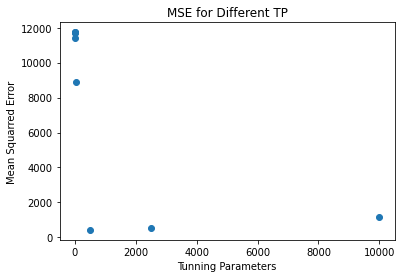

In [ ]:
# Question A4: Plot mse vs tunning parameters.
plt.scatter(tunning_para_list, lasso_avg_mse_list)
plt.xlabel("Tunning Parameters")
plt.ylabel("Mean Squarred Error")
plt.title("MSE for Different TP")
plt.show

### Question A4: The choice of tunning parameter.

By looking at the computed MSE, assuming the best model is based on the one with the lowest MSE, the best tunning parameter among the list would be 500. The MSE was decreasing gradually as the tunning parameter neared 500 but for tunning parameters greated than 500, being 2500 and 10000; the MSE was in fact increasing. Variable selection did start at 500, where the second coefficient was eliminated for all 5 cross-validation versions but only 3 of those folds also had the first coefficient eliminated. However, for the tunning parameters of 2500 and 10000, the first and second coefficients were elimnated for all 5 folds respectively. 

## **Part B** <font color="blue">(3 points)</font>
For this part upload `Wage.csv`.

1. **<font color="blue">(2 points)</font>** Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen? Make a plot of
the resulting polynomial fit to the data. 
2. **<font color="blue">(1 point)</font>** Fit a step function to predict `wage` using `age` , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.


In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Question B1: Download Wage.csv.
from google.colab import files
uploaded = files.upload()
wage_data = pd.read_csv('Wage.csv')

Saving Wage.csv to Wage.csv


In [10]:
# Question B1: Do some data exploration on 'Wage.csv'.
wage_data.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [11]:
wage_data.shape

(3000, 13)

In [12]:
wage_data.dtypes

Unnamed: 0      int64
year            int64
age             int64
sex            object
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

In [13]:
# Question B1: Extract necessary columns.
data_x = wage_data['age']
data_y = wage_data['wage']

In [ ]:
# Question B1: Do some data exploration on 'Wage.csv'.
wage_data.head()

In [83]:
# Question B1: Perform polynomial regression using 5-fold cross validation to find optimal degree.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
degree_nth_list = np.arange(2, 19)
X = np.array(data_x).reshape(-1, 1)
y = np.array(data_y)
k = 5
kf_5 = KFold(n_splits = k, random_state = 5, shuffle = True)
score_list = []
for degree_nth in degree_nth_list:
  polynomial_model = PolynomialFeatures(degree = degree_nth)
  X_poly = polynomial_model.fit_transform(X)
  linear_model = LinearRegression()
  lr_model = linear_model.fit(X_poly, y)
  y_pred = lr_model.predict(X_poly)
  y_pred_array = np.array(y_pred).reshape(-1, 1)
  score = cross_val_score(linear_model, y_pred_array, y, cv = kf_5, scoring = 'neg_mean_squared_error').mean()
  score_list.append(abs(score))
print(score_list)

[1600.9284224082257, 1595.1496171774884, 1593.4731769525113, 1593.0080914486664, 1592.017475023536, 1591.2234256309891, 1591.2860932173166, 1591.3736372905585, 1591.3293440128434, 1591.3252011036634, 1591.7006803330821, 1598.921228391237, 1607.6767303405102, 1619.6644986222013, 1633.765569165246, 1648.5978741314757, 1662.8936676172405]


Text(0.5, 1.0, 'MSE for Different Polynomial Degrees')

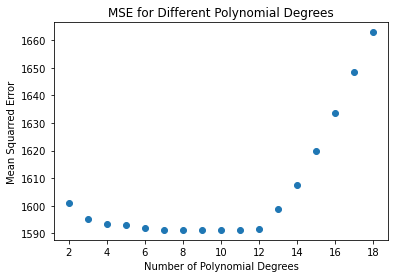

In [84]:
# Question B1: Plot MSE in function of polynomial degree.
plt.scatter(degree_nth_list, score_list)
plt.xlabel('Number of Polynomial Degrees')
plt.ylabel('Mean Squarred Error')
plt.title('MSE for Different Polynomial Degrees')

In [85]:
# Question B1: Compare the MSE of degree 7 with the rest.
def percentage_difference(value1, value2):
  Percentage = abs((value1 - value2)*100/value1)
  return str(Percentage) + " %"
MSE_7 = score_list[5]
percentage_difference_list = []
for MSE in score_list:
  percentage_difference_MSE = percentage_difference(MSE_7, MSE)
  percentage_difference_list.append(percentage_difference_MSE)
print(percentage_difference_list)

['0.6099078621462696 %', '0.24674043149800504 %', '0.1413850051025991 %', '0.11215683410200886 %', '0.049901816410979 %', '0.0 %', '0.003938327284407366 %', '0.009440010569839175 %', '0.006656411673444247 %', '0.006396051681674052 %', '0.02999294092868986 %', '0.4837663043576287 %', '1.034003424314633 %', '1.7873714359084474 %', '2.673549348821776 %', '3.605681488615283 %', '4.504096711486695 %']


### Question B1: Choose polynomial degree.
Using 5-fold cross-validation, polynomial models of degrees 2 to 18 were tested for predicting wage based on age. The polynomial of degree 7 had the lowest mean squarred error (MSE) of 1591.22. However, the highest MSE was 1662.89 being the polynomial of degree 18. The MSE was relative static from degree 6 to 12 and onwards started to increase with the increase of polynomial degree. It is worthnoting that all the models have MSE that deviate by less than 5 % relative to the lowest value of MSE. Thus, it is possible to select a model with fewer degrees as that would computational advantageous. The polynomial of degree 2 is only 0.61 % higher in MSE and degree 3 of 0.25 %. Among these two, since the difference in MSE is very small between these two model, the model with the lowest degree will be selected being of degree 2. 

In [87]:
# Question B1: Generate selected polynomial model.
polynomial_model = PolynomialFeatures(degree = 2)
X_poly_2 = polynomial_model.fit_transform(X)
linear_model = LinearRegression()
lr_model = linear_model.fit(X_poly_2, y)
y_pred = lr_model.predict(X_poly_2)

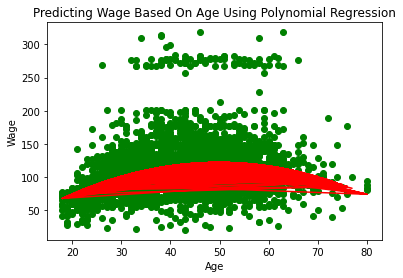

In [88]:
# Question B1: Make a plot of the resulting polynomial fit to the data.
plt.scatter(data_x, data_y, color = "green")
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Predicting Wage Based On Age Using Polynomial Regression')
plt.plot(X, y_pred,  color = "red")
plt.legend
plt.show()


## **Part C** <font color="blue">(4 points)</font>
Apply SVM and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to each other? Which of them yields the best performance?


## **Part D** <font color="blue">(3 points)</font>

1. **<font color="blue">(1 point)</font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters. 
2. **<font color="blue">(0.5 points)</font>** Use a scatterplot to visualize the produced data. 
3. **<font color="blue">(1 point)</font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
4. **<font color="blue">(0.5 points)</font>** Visualize the results, separately.  
